# Cross-validation on unbalanced data

## Stratified K-folds Cross Validation

Instead of split data at random, stratified k-folds keeps the class-ratio.

In [1]:
# Use the Breast Cancer Wisconsin dataset
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
random_state = 2**16
np.random.seed(random_state)

In [3]:
X, y = load_breast_cancer(return_X_y=True)
print(y[y==0].shape)
print(y[y==1].shape)

# create an unbalanced dataset by selecting only 30 positive samples
indices_unbalanced = np.concatenate((np.where(y==0)[0], np.where(y==1)[0][:30]))
X = X[indices_unbalanced]
y = y[indices_unbalanced]

print('Our unbalanced subset:')
print(y[y==0].shape)
print(y[y==1].shape)

print('Ratio: {:.2f}'.format(len(y[y==1])/len(y)))

(212,)
(357,)
Our unbalanced subset:
(212,)
(30,)
Ratio: 0.12


In [4]:
kfold = StratifiedKFold(n_splits=5, random_state=random_state, shuffle=True)
for idx_train, idx_test in kfold.split(X, y):
    y_train = y[idx_train]
    y_test = y[idx_test]
    print('[Train] Positive : {}, Negative: {}, Ratio: {:.2f}. [Test] Positive : {}, Negative: {},  Ratio: {:.2f}'.format(
        len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train),
        len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_test[y_test==1])/len(y_test)
    ))

[Train] Positive : 24, Negative: 169, Ratio: 0.12. [Test] Positive : 6, Negative: 43,  Ratio: 0.12
[Train] Positive : 24, Negative: 169, Ratio: 0.12. [Test] Positive : 6, Negative: 43,  Ratio: 0.12
[Train] Positive : 24, Negative: 170, Ratio: 0.12. [Test] Positive : 6, Negative: 42,  Ratio: 0.12
[Train] Positive : 24, Negative: 170, Ratio: 0.12. [Test] Positive : 6, Negative: 42,  Ratio: 0.12
[Train] Positive : 24, Negative: 170, Ratio: 0.12. [Test] Positive : 6, Negative: 42,  Ratio: 0.12


In [5]:
# Without stratified
kfold = KFold(n_splits=5, random_state=random_state, shuffle=True)
for idx_train, idx_test in kfold.split(X, y):
    y_train = y[idx_train]
    y_test = y[idx_test]
    print('[Train] Positive : {}, Negative: {}, Ratio: {:.2f}. [Test] Positive : {}, Negative: {},  Ratio: {:.2f}'.format(
        len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train),
        len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_test[y_test==1])/len(y_test)
    ))

[Train] Positive : 22, Negative: 171, Ratio: 0.11. [Test] Positive : 8, Negative: 41,  Ratio: 0.16
[Train] Positive : 29, Negative: 164, Ratio: 0.15. [Test] Positive : 1, Negative: 48,  Ratio: 0.02
[Train] Positive : 22, Negative: 172, Ratio: 0.11. [Test] Positive : 8, Negative: 40,  Ratio: 0.17
[Train] Positive : 23, Negative: 171, Ratio: 0.12. [Test] Positive : 7, Negative: 41,  Ratio: 0.15
[Train] Positive : 24, Negative: 170, Ratio: 0.12. [Test] Positive : 6, Negative: 42,  Ratio: 0.12


# Preprocessing

## Imputation of Missing Values

1. Ignore the tuple
1. Fill in the missing value manually (Require experts)
1. Use a global constant
1. Use a meaure of central tendency for the attribute (e.g, Mean, Median, or Most frequent)
1. Use the attribute for the samples beloging to the same class as the given tuple (Limited usage)
1. Use the most probable value
1. And more...

### Which imputation strategy is the best?

Depends on the data; Use cross-validation to test your results;

In [6]:
import numpy as np
from sklearn import datasets

In [7]:
X, y = datasets.load_iris(return_X_y=True)
print(X.shape)  # Iris dataset has 150 samples, and each sample has 4 attributes

# There are 150 * 4 = 600 observations, randomly picking 10% of observations.
masked_indices = np.random.permutation(600)[:int(0.1*600)]

# create a copy but with 10% missing value
X_miss = X.copy()
X_miss.reshape(-1)[masked_indices] = np.nan
X_miss[:10]

(150, 4)


array([[5.1, 3.5, nan, 0.2],
       [4.9, nan, 1.4, nan],
       [4.7, 3.2, nan, 0.2],
       [4.6, nan, 1.5, 0.2],
       [nan, nan, 1.4, 0.2],
       [nan, 3.9, 1.7, 0.4],
       [nan, nan, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, nan, 0.1]])

### 1. Ignore the tuple
Delete empty samples which contain empty attributes

In [8]:
isnan = np.isnan(X_miss)
print('Returns True if the observation is NaN:')
print(isnan[:5])

print('\nReturns 1 if the sample has empty attribute:')
sample_has_nan = np.sum(isnan, axis=1)
print(sample_has_nan[:5])

# Find samples with no empty attribute
idx = np.where(sample_has_nan == 0)[0]
X_filtered = X_miss[idx]

print('\nAfter filter:')
print(X_filtered.shape)

# Put everything in one line
np.where(np.sum(np.isnan(X_miss), axis=1))[0]

Returns True if the observation is NaN:
[[False False  True False]
 [False  True False  True]
 [False False  True False]
 [False  True False False]
 [ True  True False False]]

Returns 1 if the sample has empty attribute:
[1 2 1 1 2]

After filter:
(101, 4)


array([  0,   1,   2,   3,   4,   5,   6,   9,  11,  16,  20,  23,  24,
        31,  36,  40,  42,  46,  50,  52,  53,  56,  59,  66,  68,  69,
        71,  72,  79,  81,  86,  88,  93,  94, 101, 102, 103, 105, 107,
       113, 119, 122, 126, 129, 134, 139, 144, 145, 147])

### 3. Use a global constant

In [9]:
# Fill the missing value with -1
X_fill = np.nan_to_num(X_miss, copy=True, nan=-1)
X_fill[:5]

array([[ 5.1,  3.5, -1. ,  0.2],
       [ 4.9, -1. ,  1.4, -1. ],
       [ 4.7,  3.2, -1. ,  0.2],
       [ 4.6, -1. ,  1.5,  0.2],
       [-1. , -1. ,  1.4,  0.2]])

### 4. Use a meaure of central tendency for the attribute

Available options:

1. Mean
1. Median
1. Most frequent

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
# Fill with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_miss)
X_filled = imputer.transform(X_miss)

print('Imputed data:\n', X_filled[:10])

Imputed data:
 [[5.1        3.5        3.78666667 0.2       ]
 [4.9        3.05839416 1.4        1.19057971]
 [4.7        3.2        3.78666667 0.2       ]
 [4.6        3.05839416 1.5        0.2       ]
 [5.86538462 3.05839416 1.4        0.2       ]
 [5.86538462 3.9        1.7        0.4       ]
 [5.86538462 3.05839416 1.4        0.3       ]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        3.78666667 0.1       ]]


In [12]:
# Fill with median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_miss)
X_filled = imputer.transform(X_miss)

print('Imputed data:\n', X_filled[:10])

Imputed data:
 [[5.1  3.5  4.4  0.2 ]
 [4.9  3.   1.4  1.3 ]
 [4.7  3.2  4.4  0.2 ]
 [4.6  3.   1.5  0.2 ]
 [5.85 3.   1.4  0.2 ]
 [5.85 3.9  1.7  0.4 ]
 [5.85 3.   1.4  0.3 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  4.4  0.1 ]]


In [13]:
# Fill with most frequent value
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X_miss)
X_filled = imputer.transform(X_miss)

print('Ground truth:\n', X[:10])
print('\nImputed data:\n', X_filled[:10])

Ground truth:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Imputed data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.4 0.2]
 [4.6 3.  1.5 0.2]
 [6.3 3.  1.4 0.2]
 [6.3 3.9 1.7 0.4]
 [6.3 3.  1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.4 0.1]]


### 5. Use the attribute for the samples beloging to the same class as the given tuple (Limited usage)

- Assuming missing value only exist in the training data.
- The same strategy does NOT apply to impute the test data

### 6. Use the most probable value

NOTE: `IterativeImputer` in `sklearn` is an experimental feature.

- Multivariate imputer that estimates each feature from all the others.
- The default estimator is `BayesianRidge` regression.
- `initial_strategy` is used to fill the missing values in the frist iteration.

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [15]:
imputer = IterativeImputer(missing_values=np.nan, max_iter=12, initial_strategy='median', random_state=random_state)
imputer.fit(X_miss)
X_filled = imputer.transform(X_miss)

print('Ground truth:\n', X[:10])
print('\nImputed data:\n', X_filled[:10])

Ground truth:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Imputed data:
 [[5.1        3.5        1.48134366 0.2       ]
 [4.9        3.32604268 1.4        0.21644777]
 [4.7        3.2        1.36728283 0.2       ]
 [4.6        3.04100295 1.5        0.2       ]
 [4.88625578 3.30584689 1.4        0.2       ]
 [5.37928008 3.9        1.7        0.4       ]
 [4.84545016 3.34292857 1.4        0.3       ]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.45344586 0.1       ]]


### 7. Nearest-eighbours imputation

In [16]:
from sklearn.impute import KNNImputer

In [17]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(X_miss)
X_filled = imputer.transform(X_miss)

print('Ground truth:\n', X[:10])
print('\nImputed data:\n', X_filled[:10])

Ground truth:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Imputed data:
 [[5.1  3.5  1.46 0.2 ]
 [4.9  3.22 1.4  0.18]
 [4.7  3.2  1.5  0.2 ]
 [4.6  3.36 1.5  0.2 ]
 [4.78 3.36 1.4  0.2 ]
 [5.16 3.9  1.7  0.4 ]
 [5.06 3.48 1.4  0.3 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.42 0.1 ]]


### Marking the imputed values

- Missing data may need to be inferred.
- **Feature crafting**: Use missing data indicator as a feature

In [18]:
from sklearn.impute import MissingIndicator

In [19]:
indicator = MissingIndicator(missing_values=np.nan)
missing_attributes = indicator.fit_transform(X_miss)
# Explicit cast boolean to integer
missing_attributes = missing_attributes.astype(np.int)

print(missing_attributes[:10])

[[0 0 1 0]
 [0 1 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]


In [20]:
# Add indicators as new attributes / columns
X_with_indicator = np.hstack((X_filled, missing_attributes))

print(X_with_indicator[:10])

[[5.1  3.5  1.46 0.2  0.   0.   1.   0.  ]
 [4.9  3.22 1.4  0.18 0.   1.   0.   1.  ]
 [4.7  3.2  1.5  0.2  0.   0.   1.   0.  ]
 [4.6  3.36 1.5  0.2  0.   1.   0.   0.  ]
 [4.78 3.36 1.4  0.2  1.   1.   0.   0.  ]
 [5.16 3.9  1.7  0.4  1.   0.   0.   0.  ]
 [5.06 3.48 1.4  0.3  1.   1.   0.   0.  ]
 [5.   3.4  1.5  0.2  0.   0.   0.   0.  ]
 [4.4  2.9  1.4  0.2  0.   0.   0.   0.  ]
 [4.9  3.1  1.42 0.1  0.   0.   1.   0.  ]]


### Fun fact
There was a DNN on diagnosing skin cancer that had very high accuracy on training data. However, the model did not work at inference time. Later on, they realised that all the positive samples in the training data have a ruler in the image. The model learned to identify the ruler instead of cancer. 

**Takeaway:** Be cautious about feature crafting

The DNN on diagnosing 

### Learning Resources

- [`sklearn` Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)

## Data Reduction

### Principal Components Analysis (PCA)

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
X, y = fetch_openml('mnist_784', version=1, data_home='./data', return_X_y=True, as_frame=False)
y = y.astype(np.long)

In [23]:
def show_img(n, X):
    plt.figure(figsize=(0.6*n, 2))
    for i in range(n):
        plt.subplot((n//10), 10, i+1)  # use the remainder as the index
        plt.imshow(X[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
    plt.show()

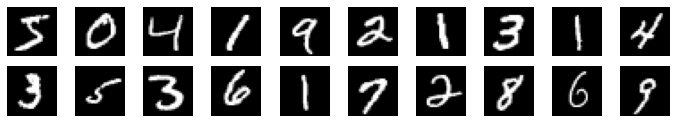

In [24]:
show_img(20, X)

In [25]:
def show_img_by_digit(digit, n, X):
    idx = np.where(y == digit)[0]
    X_digit = X[idx]
    plt.figure(figsize=(0.6*n, 2))
    for i in range(n):
        plt.subplot((n//10), 10, i+1)  # use the remainder as the index
        plt.imshow(X_digit[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
    plt.show()

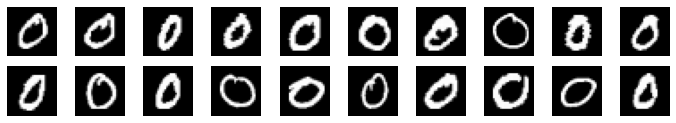

In [26]:
show_img_by_digit(0, 20, X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [28]:
model1 = RandomForestClassifier(n_estimators=20, max_depth=20)
model1.fit(X_train, y_train)

acc_train = model1.score(X_train, y_train)
print('Accuracy on training set: {:2.2%}\n'.format(acc_train))
acc_test = model1.score(X_test, y_test)
print('Accuracy on test set: {:2.2%}\n'.format(acc_test))

Accuracy on training set: 99.91%

Accuracy on test set: 95.81%



In [29]:
# Select the 1st 200 principle components
pca = PCA(n_components=200, svd_solver='randomized', whiten=True)
pca.fit(X_train)

# We are training the model with only 150 features
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

(49000, 200)


In [30]:
model2 = RandomForestClassifier(n_estimators=20, max_depth=20)
model2.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

acc_train = model2.score(X_train_pca, y_train)
print('Accuracy on training set: {:2.2%}\n'.format(acc_train))
acc_test = model2.score(X_test_pca, y_test)
print('Accuracy on test set: {:2.2%}\n'.format(acc_test))

Accuracy on training set: 99.96%

Accuracy on test set: 91.40%



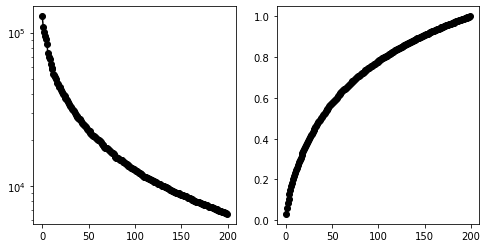

In [31]:
singular_values = pca.singular_values_

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.semilogy(singular_values, '-o', color='k')

ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(singular_values)/np.sum(singular_values), '-o', color='k')

plt.show()

Original images


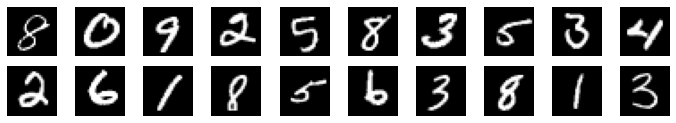

After inverse transform


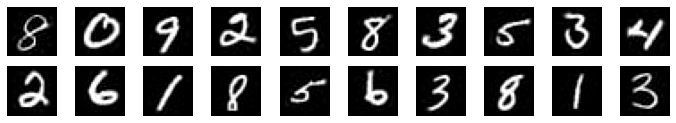

In [32]:
# Convert PC back to original space
X_compressed = pca.inverse_transform(X_test_pca)

print('Original images')
show_img(20, X_test)

print('After inverse transform')
show_img(20, X_compressed)

(21000, 30)
After inverse transform


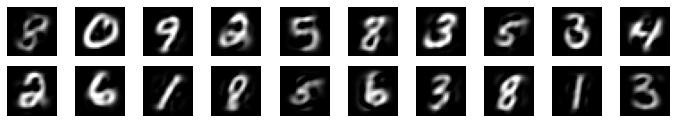

In [33]:
# Let's try with only 30 PC
pca = PCA(n_components=30, svd_solver='randomized', whiten=True)
pca.fit(X_train)

# We are training the model with only 150 features
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

X_compressed = pca.inverse_transform(X_test_pca)

print('After inverse transform')
show_img(20, X_compressed)

## Noisy Data

1. Binning
1. Regression
1. Outlier analysis

### 1. Binning

In [34]:
from sklearn.preprocessing import KBinsDiscretizer

In [35]:
# Let use Iris dataset
X, y = datasets.load_iris(return_X_y=True)

In [36]:
X_noisy = X + np.random.normal(0, 0.3, size=X.shape)
print('Clean data:')
print(X[:10])
print('\nNoisy data:')
print(X_noisy[:10])

Clean data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

Noisy data:
[[ 5.22888632  3.29254744  1.28694805 -0.04760878]
 [ 5.34561356  3.17165142  1.64134854  0.29882057]
 [ 4.45386981  3.44315287  1.85468669  0.81931967]
 [ 3.92561896  2.95387189  1.5615876   0.29586053]
 [ 5.0326473   3.41100799  0.80440185  0.3257559 ]
 [ 5.96345753  3.85512607  2.1174459   0.17324352]
 [ 4.76242544  3.14146767  1.51601109 -0.27621281]
 [ 4.80203865  3.45266409  1.47675913  0.48768461]
 [ 4.71640585  3.41463183  1.11254864 -0.08326241]
 [ 5.06047287  2.87108954  1.41827747  0.03020114]]


In [37]:
estimator = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
estimator.fit(X_noisy)

X_bin = estimator.transform(X_noisy)
print('After binning:')
print(X_bin[:10])

X_est = estimator.inverse_transform(X_bin)
print('\nSmoothed data:')
print(X_est[:10])

After binning:
[[ 6. 11.  1.  1.]
 [ 7. 10.  2.  4.]
 [ 2. 12.  3.  7.]
 [ 0.  8.  2.  4.]
 [ 5. 11.  0.  4.]
 [10. 14.  4.  3.]
 [ 4. 10.  2.  0.]
 [ 4. 12.  2.  5.]
 [ 3. 11.  0.  1.]
 [ 5.  8.  1.  2.]]

Smoothed data:
[[ 5.2290472   3.35813974  1.28578238 -0.12507862]
 [ 5.42957462  3.21187141  1.60670274  0.34180529]
 [ 4.42693751  3.50440806  1.9276231   0.8086892 ]
 [ 4.02588267  2.91933475  1.60670274  0.34180529]
 [ 5.02851977  3.35813974  0.96486203  0.34180529]
 [ 6.03115688  3.79694472  2.24854345  0.18617732]
 [ 4.82799235  3.21187141  1.60670274 -0.28070658]
 [ 4.82799235  3.50440806  1.60670274  0.49743326]
 [ 4.62746493  3.35813974  0.96486203 -0.12507862]
 [ 5.02851977  2.91933475  1.28578238  0.03054935]]


## Data Transformation

1. Smoothing
1. Attribute construction
1. Aggregation
1. Normalization
1. Discretization
1. Concept hierarchy generation for nominal data
1. One-hot-encoding

### 4. Min-Max normalization

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# The Iris dataset
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [40]:
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

print(X_scaled[:10])

print('\nBefore scaling:')
print('Max:', X.max(axis=0))
print('Min:', X.min(axis=0))

print('\nAfter scaling:')
print('Max:', X_scaled.max(axis=0))
print('Min:', X_scaled.min(axis=0))

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]

Before scaling:
Max: [7.9 4.4 6.9 2.5]
Min: [4.3 2.  1.  0.1]

After scaling:
Max: [1. 1. 1. 1.]
Min: [0. 0. 0. 0.]


## Data Integration

1. Redundancy and correlation analysis
1. Feature importances

### $\chi^2$ Correlation Test

- $\chi^2$ (chi-square) test for nominal data (categorical)

<br/>
$H_0$: Null hypothesis, two attributes are independent.

$H_{\alpha}$: Alternative hypothesis, two attributes are not independent.
<br/>

**Question**

A group of 1500 people was surveyed. We recorded 2 attributes: gender and preferred reading (fiction or non-fiction).

| |Male |Female |Total |
|--- | ---:| ---:| ---:|
|fiction|250 (90)|200 (360)|**450**|
|non-fiction|50 (210)|1000 (840) |**1050**|
|**Total**|**300**|**1200**|**1500**|

E.g., 250 (90): Observed 250 males who prefer fiction; Expected frequency is 90.

- i: gender
- j: preferred reading

$$e_{11}= \frac{\text{count}(A=a_i) \times \text{count}(B=b_j)}{n} = \frac{300 \times 450}{1500}=90$$
$$e_{12}= \frac{300 \times 1050}{1500} = 210$$
$$e_{21}= \frac{1200 \times 450}{1500} = 360$$
$$e_{22}= \frac{1200 \times 1050}{1500} = 840$$


In [41]:
chi = (250-90)**2/90 + (50-210)**2/210 + (200-360)**2/360 + (1000-840)**2/840
print(chi)

507.93650793650795


In [42]:
# Degree of freedom
df = (2-1)*(2-1)
print(df)

1


- For 1 df, $\chi^2$ value needed to reject the hypothesis at the 0.001 significance level is 10.828
- We reject the hypothesis that gender and preferred_reading are independent.
- Two attributes are strongly correlated for the given group of people.

In [43]:
from scipy.stats import chi2_contingency

In [44]:
data = np.array([[250, 50], [200, 1000]], dtype=np.int)
print(data)

[[ 250   50]
 [ 200 1000]]


In [45]:
chi2, p, df, ex = chi2_contingency(data)
print('Chi2 test:', chi2)
print('p-value:', p)
print('Degree of Freedom:', df)
print('Expected value:', ex)

Chi2 test: 504.76686507936506
p-value: 8.725823025133513e-112
Degree of Freedom: 1
Expected value: [[ 90. 210.]
 [360. 840.]]


In [46]:
significance_level = 0.001
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

Reject NULL HYPOTHESIS


### Covariance and Correlation

In [47]:
# Use the Breast Cancer Wisconsin dataset
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [48]:
# Load the dataset as Pandas DataFrame
df_X, df_y = load_breast_cancer(return_X_y=True, as_frame=True)

df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Variance

- Do you want to normalize the data?
- Any outlier?

In [49]:
# Compute variance
df_X.var()

mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324167.385102
worst smoothness

In [50]:
# Add y as an attribute
# We want to know the correlation between any attribute and the target.
df = df_X.copy()
df['target'] = df_y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Covariance

- Covariance indicates how much 2 attributes change together
- cov(A, B) = 0, if A and B are independent.
- cov(A, B) > 0, A and B are positively correlated.
- cov(A, B) < 0, A and B are negatively correlated.
- A and B are in different scales, so the value doesn't mean much.


In [51]:
df.cov()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,12.418920,4.907582,85.447142,1224.483409,0.008454,0.094197,0.190128,0.112475,0.014273,-7.753706e-03,...,6.433100,114.288570,1888.227223,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,-1.244954
mean texture,4.907582,18.498909,34.439759,485.993787,-0.001415,0.053767,0.103692,0.048977,0.008419,-2.321158e-03,...,24.110148,51.745933,841.283832,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,-0.864145
mean perimeter,85.447142,34.439759,590.440480,8435.772345,0.070836,0.714714,1.387234,0.802360,0.121922,-4.485888e-02,...,45.258113,792.328208,13026.148359,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,-8.732438
mean area,1224.483409,485.993787,8435.772345,123843.554318,0.876178,9.264931,19.244924,11.241958,1.459596,-7.034264e-01,...,621.824934,11341.789807,192192.557633,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,-120.738222
mean smoothness,0.008454,-0.001415,0.070836,0.876178,0.000198,0.000490,0.000585,0.000302,0.000215,5.806859e-05,...,0.003118,0.112879,1.655299,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,-0.002440
mean compactness,0.094197,0.053767,0.714714,9.264931,0.000490,0.002789,0.003718,0.001703,0.000873,2.108131e-04,...,0.080544,1.047413,15.323436,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,-0.015246
mean concavity,0.190128,0.103692,1.387234,19.244924,0.000585,0.003718,0.006355,0.002850,0.001094,1.895588e-04,...,0.146934,1.954350,30.682405,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,-0.026864
mean concave points,0.112475,0.048977,0.802360,11.241958,0.000302,0.001703,0.002850,0.001506,0.000492,4.572905e-05,...,0.069819,1.116016,17.886881,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,-0.014583
mean symmetry,0.014273,0.008419,0.121922,1.459596,0.000215,0.000873,0.001094,0.000492,0.000752,9.289106e-05,...,0.015274,0.201896,2.765725,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217,-0.004384
mean fractal dimension,-0.007754,-0.002321,-0.044859,-0.703426,0.000058,0.000211,0.000190,0.000046,0.000093,4.984872e-05,...,-0.002225,-0.048671,-0.932024,0.000081,0.000510,0.000510,0.000081,0.000146,0.000098,0.000044


#### Correlation

- Very similar to covariance, but scale from -1 to 1.

In [52]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


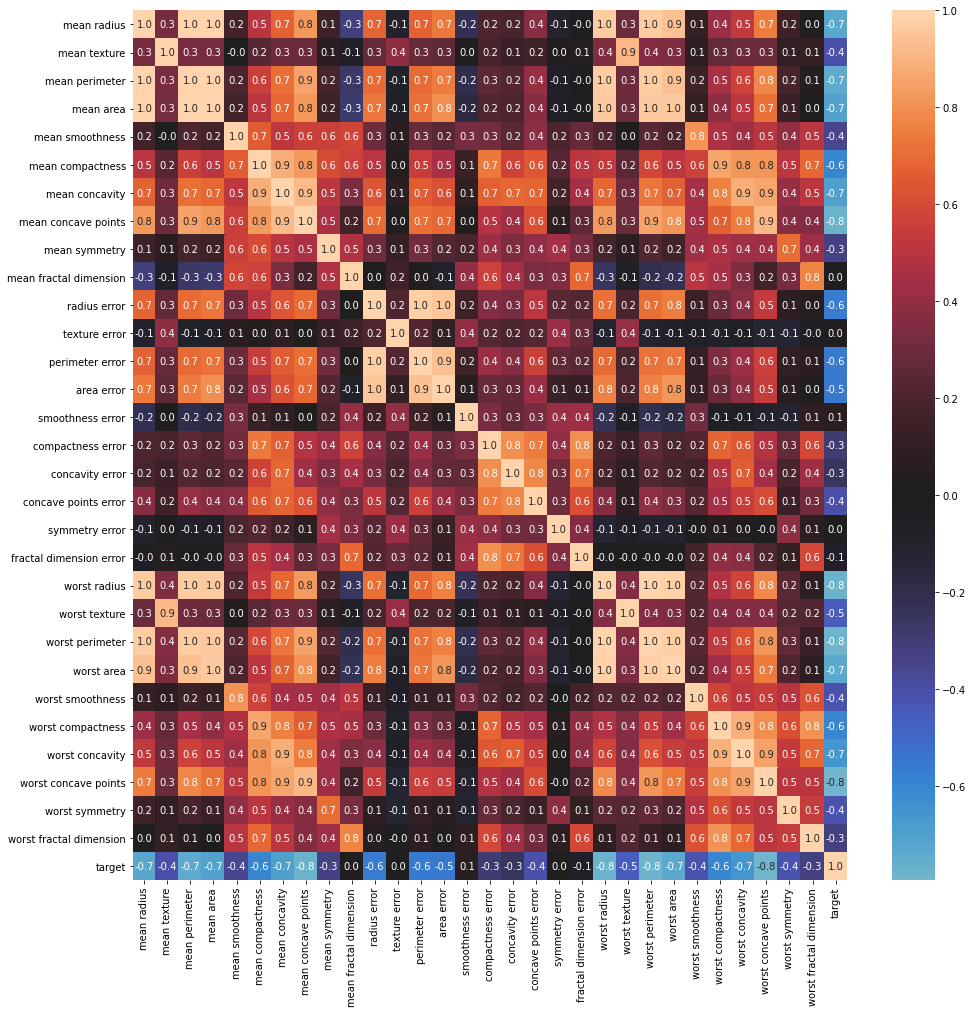

In [53]:
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.corr(), annot=True, fmt='.1f', center=0)